In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('../data/MTA_Subway_Terminal_On-Time_Performance__2015-2019.csv')
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874,9017,0.762338
1,2015-01,2,A DIVISION,1,2920,6175,0.472874
2,2015-01,3,A DIVISION,1,4004,5834,0.686322
3,2015-01,4,A DIVISION,1,3692,7623,0.484324
4,2015-01,5,A DIVISION,1,3203,6491,0.493452
...,...,...,...,...,...,...,...
1660,2019-12,S Fkln,B DIVISION,2,2072,2092,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379,3528,0.957766
1662,2019-12,S Rock,B DIVISION,2,1497,1544,0.969560
1663,2019-12,Systemwide,Systemwide,1,137946,172004,0.801993


In [4]:
df['date'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['season'] = df['date'].dt.quarter

df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
0,1,1,A DIVISION,1,6874,9017,0.762338,2015-01-01,2015,1
1,1,2,A DIVISION,1,2920,6175,0.472874,2015-01-01,2015,1
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015,1
3,1,4,A DIVISION,1,3692,7623,0.484324,2015-01-01,2015,1
4,1,5,A DIVISION,1,3203,6491,0.493452,2015-01-01,2015,1
...,...,...,...,...,...,...,...,...,...,...
1660,12,S Fkln,B DIVISION,2,2072,2092,0.990440,2019-12-01,2019,4
1661,12,S Rock,B DIVISION,1,3379,3528,0.957766,2019-12-01,2019,4
1662,12,S Rock,B DIVISION,2,1497,1544,0.969560,2019-12-01,2019,4
1663,12,Systemwide,Systemwide,1,137946,172004,0.801993,2019-12-01,2019,4


In [11]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

month                           0
line                            0
division                        0
day_type                        0
num_on_time_trips               0
num_sched_trips                 0
terminal_on_time_performance    0
date                            0
year                            0
season                          0
dtype: int64

In [7]:
df_l = df[df['line'] == 'L']
df_l

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
16,1,L,B DIVISION,1,9109,9808,0.928732,2015-01-01,2015,1
40,2,L,B DIVISION,1,8216,9505,0.864387,2015-02-01,2015,1
64,3,L,B DIVISION,1,10286,11187,0.919460,2015-03-01,2015,1
88,4,L,B DIVISION,1,9972,10792,0.924018,2015-04-01,2015,2
112,5,L,B DIVISION,1,9561,10036,0.952670,2015-05-01,2015,2
...,...,...,...,...,...,...,...,...,...,...
1556,10,L,B DIVISION,2,2249,2370,0.948945,2019-10-01,2019,4
1602,11,L,B DIVISION,1,9482,9956,0.952391,2019-11-01,2019,4
1603,11,L,B DIVISION,2,2615,2816,0.928622,2019-11-01,2019,4
1649,12,L,B DIVISION,1,9822,10291,0.954426,2019-12-01,2019,4


In [8]:
df_l_avg_year = df_l.groupby(['year'])['terminal_on_time_performance'].mean()
df_l_avg_year

year
2015    0.917888
2016    0.903113
2017    0.935677
2018    0.910993
2019    0.929560
Name: terminal_on_time_performance, dtype: float64

In [9]:
df_l_avg = df_l.groupby(['year', 'month'])['terminal_on_time_performance'].mean()
df_l_avg.head()

year  month
2015  1        0.928732
      2        0.864387
      3        0.919460
      4        0.924018
      5        0.952670
Name: terminal_on_time_performance, dtype: float64

In [12]:
df_l_avg['yearly_avg'] = df_l_avg.groupby(['year'])['terminal_on_time_performance'].transform('mean')
df_l_avg

KeyError: 'Column not found: terminal_on_time_performance'

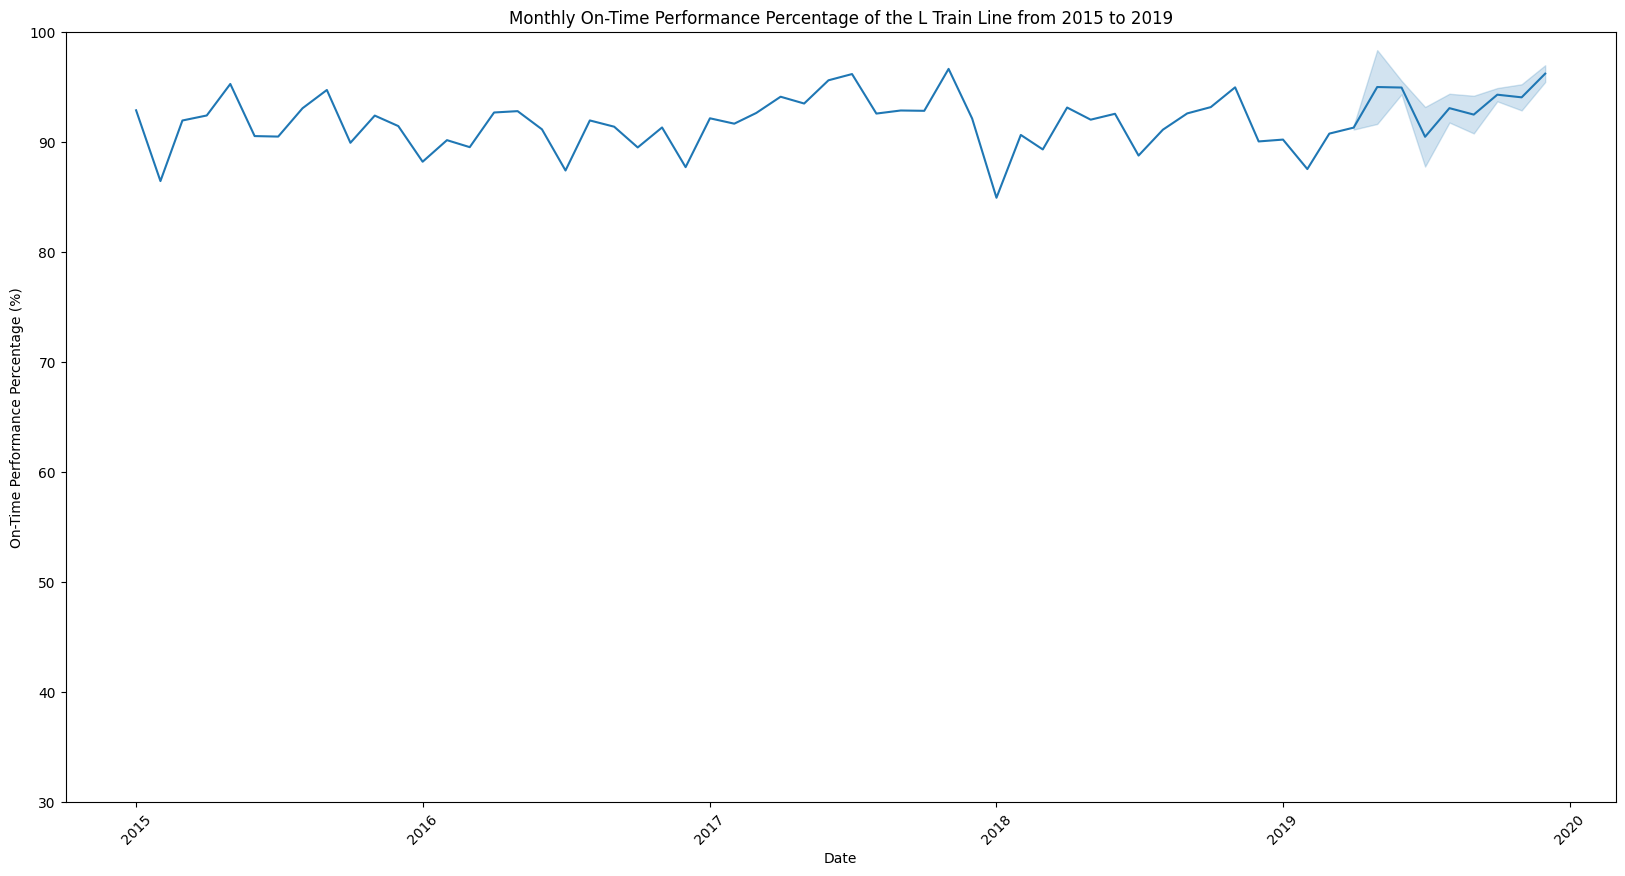

In [ ]:
# Create a line chart showing the monthly on-time performance percentage of the 3 train line from 2015 to 2019.
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y=df_l['terminal_on_time_performance']*100, data=df_l)

plt.title('Monthly On-Time Performance Percentage of the L Train Line from 2015 to 2019')
plt.xlabel('Date')
plt.ylabel('On-Time Performance Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(30, 100)
plt.show()